In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train=pd.read_csv('../input/titanic/train.csv')

In [3]:
test=pd.read_csv('../input/titanic/test.csv') 

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.isnull().sum() 


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

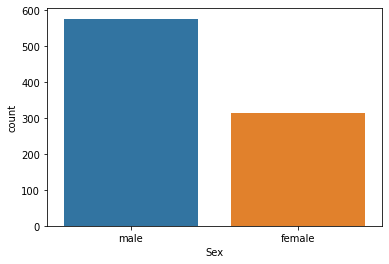

In [6]:
sns.countplot(x='Sex', data=train)


<AxesSubplot:xlabel='Pclass', ylabel='count'>

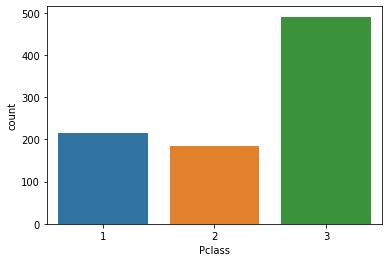

In [7]:
sns.countplot(x='Pclass', data=train)


<AxesSubplot:xlabel='Embarked', ylabel='count'>

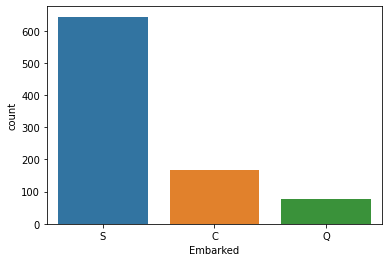

In [8]:
sns.countplot(x='Embarked', data=train)


<AxesSubplot:xlabel='SibSp', ylabel='count'>

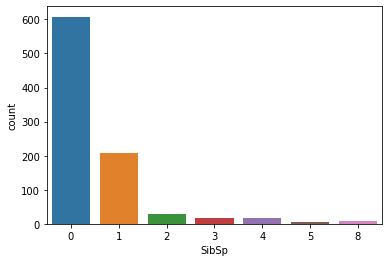

In [9]:
sns.countplot(x='SibSp', data=train)

In [10]:
train['Died'] = 1 - train['Survived']


<AxesSubplot:xlabel='Sex'>

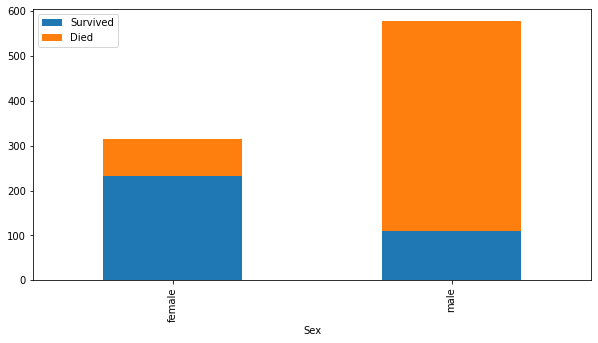

In [11]:
train.groupby('Sex')[['Survived', 'Died']].sum().plot(kind='bar',
                                                           figsize=(10, 5),
                                                           stacked=True)

In [12]:
train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [13]:
train['Name'][1].split(',')[1].split('.')[0]

' Mrs'

In [14]:
train['Title']=train['Name'].apply(lambda x : x.split(',')[1].split('.')[0])

In [15]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Died,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Mr


In [16]:
train['Title'].value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Mlle              2
 Major             2
 Col               2
 the Countess      1
 Capt              1
 Ms                1
 Sir               1
 Lady              1
 Mme               1
 Don               1
 Jonkheer          1
Name: Title, dtype: int64

In [17]:
Title_Dictionary = {" Capt": "Officer"," Col": "Officer"," Major": "Officer"," Jonkheer": "Royalty",
                    " Don": "Royalty"," Sir" : "Royalty",
                    " Dr": "Officer"," Rev": "Officer"," the Countess":"Royalty"," Mme": "Mrs"," Mlle": "Miss",
                    " Ms": "Mrs"," Mr" : "Mr"," Mrs" : "Mrs"," Miss" : "Miss"," Master" : "Master"," Lady" : "Royalty"}

In [18]:
train['Title']=train['Title'].map(Title_Dictionary)

In [19]:
train['Title'].value_counts()

Mr         517
Miss       184
Mrs        127
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64

In [20]:
df1=train.drop(['Name','Ticket','Cabin','PassengerId','Died'], axis=1)


In [21]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


In [22]:
dummies = pd.get_dummies(df1[['Sex','Title']], drop_first= True)

In [23]:
df1 = pd.concat([df1, dummies], axis=1)

In [24]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Sex_male,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,0,3,male,22.0,1,0,7.2500,S,Mr,1,0,1,0,0,0
1,1,1,female,38.0,1,0,71.2833,C,Mrs,0,0,0,1,0,0
2,1,3,female,26.0,0,0,7.9250,S,Miss,0,1,0,0,0,0
3,1,1,female,35.0,1,0,53.1000,S,Mrs,0,0,0,1,0,0
4,0,3,male,35.0,0,0,8.0500,S,Mr,1,0,1,0,0,0


In [25]:
df1 = df1.drop(['Title',  'Sex'], axis = 1)

In [26]:
df1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_male,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,0,3,22.0,1,0,7.2500,S,1,0,1,0,0,0
1,1,1,38.0,1,0,71.2833,C,0,0,0,1,0,0
2,1,3,26.0,0,0,7.9250,S,0,1,0,0,0,0
3,1,1,35.0,1,0,53.1000,S,0,0,0,1,0,0
4,0,3,35.0,0,0,8.0500,S,1,0,1,0,0,0


In [27]:
median_age_men=df1[df1['Sex_male']==1]['Age'].median()
median_age_women=df1[df1['Sex_male']==0]['Age'].median()

In [28]:
def function(age,sex):
    if np.isnan(age):
        if sex == 1:
            return median_age_men
        else:
            return median_age_women
    else:
        return age

In [29]:
df1['Age']= df1.apply(lambda x : function(x['Age'], x['Sex_male']),axis=1)


In [30]:
df1.isnull().sum()

Survived         0
Pclass           0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         2
Sex_male         0
Title_Miss       0
Title_Mr         0
Title_Mrs        0
Title_Officer    0
Title_Royalty    0
dtype: int64

In [31]:
df1.dropna(inplace=True)


In [32]:
df1.isnull().sum()

Survived         0
Pclass           0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
Sex_male         0
Title_Miss       0
Title_Mr         0
Title_Mrs        0
Title_Officer    0
Title_Royalty    0
dtype: int64

In [33]:
dummy_emb = pd.get_dummies(df1['Embarked'], drop_first= True)

In [34]:
df1 = pd.concat([df1, dummy_emb], axis=1)

In [35]:
df1 = df1.drop(['Embarked'], axis = 1)

In [36]:
df1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1,0,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,1,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,1,0,0,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1,0,0,0,0,1


In [37]:
df1.isnull().sum()

Survived         0
Pclass           0
Age              0
SibSp            0
Parch            0
Fare             0
Sex_male         0
Title_Miss       0
Title_Mr         0
Title_Mrs        0
Title_Officer    0
Title_Royalty    0
Q                0
S                0
dtype: int64

In [38]:
df1.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Q,S
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.395017,0.524184,0.382452,32.096681,0.649044,0.205849,0.581552,0.141732,0.020247,0.005624,0.086614,0.724409
std,0.486260,0.834700,12.984264,1.103705,0.806761,49.697504,0.477538,0.404548,0.493582,0.348972,0.140925,0.074826,0.281427,0.447063
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
df1.Age = (df1.Age-min(df1.Age))/(max(df1.Age)-min(df1.Age))

In [40]:
df1.Fare = (df1.Fare-min(df1.Fare))/(max(df1.Fare)-min(df1.Fare))


In [41]:
df1.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Q,S
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.364099,0.524184,0.382452,0.062649,0.649044,0.205849,0.581552,0.141732,0.020247,0.005624,0.086614,0.724409
std,0.486260,0.834700,0.163160,1.103705,0.806761,0.097003,0.477538,0.404548,0.493582,0.348972,0.140925,0.074826,0.281427,0.447063
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.271174,0.000000,0.000000,0.015412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,0.359135,0.000000,0.000000,0.028213,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,0.434531,1.000000,0.000000,0.060508,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,8.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
from sklearn.model_selection import train_test_split


In [43]:
X = df1.drop('Survived', axis=1)
y = df1['Survived']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=df1['Survived'],random_state=101)

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
model = LogisticRegression()

In [47]:
model.fit(X_train, y_train)

LogisticRegression()

In [48]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [49]:
predictions = model.predict(X_test)

In [50]:
accuracy_score(y_test, predictions)

0.8370786516853933

In [51]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       110
           1       0.84      0.71      0.77        68

    accuracy                           0.84       178
   macro avg       0.84      0.81      0.82       178
weighted avg       0.84      0.84      0.83       178



In [52]:
print(confusion_matrix(y_test, predictions))

[[101   9]
 [ 20  48]]


# Test 

In [53]:
test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [54]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [55]:
test['Title']=test['Name'].apply(lambda x : x.split(',')[1].split('.')[0])

In [56]:
test['Title'].value_counts()

 Mr        240
 Miss       78
 Mrs        72
 Master     21
 Col         2
 Rev         2
 Ms          1
 Dr          1
 Dona        1
Name: Title, dtype: int64

In [57]:
test['Title'][414]

' Dona'

In [58]:
Title_Dictionary2 = {" Capt": "Officer"," Col": "Officer"," Major": "Officer"," Jonkheer": "Royalty",
                    " Don": "Royalty"," Sir" : "Royalty"," Dona": "Royalty",
                    " Dr": "Officer"," Rev": "Officer"," the Countess":"Royalty"," Mme": "Mrs"," Mlle": "Miss",
                    " Ms": "Mrs"," Mr" : "Mr"," Mrs" : "Mrs"," Miss" : "Miss"," Master" : "Master"," Lady" : "Royalty"}

In [59]:
test['Title']=test['Title'].map(Title_Dictionary2)

In [60]:
test['Title'].value_counts()

Mr         240
Miss        78
Mrs         73
Master      21
Officer      5
Royalty      1
Name: Title, dtype: int64

In [61]:
df2=test.drop(['Name','Ticket','Cabin','PassengerId'], axis=1)

In [62]:
df2.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
Title        0
dtype: int64

In [63]:
dummies_test = pd.get_dummies(df2[['Sex','Title']], drop_first= True)

In [64]:
df2 = pd.concat([df2, dummies_test], axis=1)

In [65]:
df2 = df2.drop(['Title',  'Sex'], axis = 1)

In [66]:
df2['Age']= df2.apply(lambda x : function(x['Age'], x['Sex_male']),axis=1)


In [67]:
df2.isnull().sum()

Pclass           0
Age              0
SibSp            0
Parch            0
Fare             1
Embarked         0
Sex_male         0
Title_Miss       0
Title_Mr         0
Title_Mrs        0
Title_Officer    0
Title_Royalty    0
dtype: int64

In [68]:
df2['Fare']=df2['Fare'].fillna(df2['Fare'].median())

In [69]:
df2.isnull().sum()

Pclass           0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
Sex_male         0
Title_Miss       0
Title_Mr         0
Title_Mrs        0
Title_Officer    0
Title_Royalty    0
dtype: int64

In [70]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pclass         418 non-null    int64  
 1   Age            418 non-null    float64
 2   SibSp          418 non-null    int64  
 3   Parch          418 non-null    int64  
 4   Fare           418 non-null    float64
 5   Embarked       418 non-null    object 
 6   Sex_male       418 non-null    uint8  
 7   Title_Miss     418 non-null    uint8  
 8   Title_Mr       418 non-null    uint8  
 9   Title_Mrs      418 non-null    uint8  
 10  Title_Officer  418 non-null    uint8  
 11  Title_Royalty  418 non-null    uint8  
dtypes: float64(2), int64(3), object(1), uint8(6)
memory usage: 22.2+ KB


In [71]:
df2.select_dtypes(['object']).columns

Index(['Embarked'], dtype='object')

In [72]:
dummy_emb_test = pd.get_dummies(df2['Embarked'], drop_first= True)

In [73]:
df2 = pd.concat([df2, dummy_emb_test], axis=1)

In [74]:
df2 = df2.drop(['Embarked'], axis = 1)

In [75]:
df2.select_dtypes(['object']).columns

Index([], dtype='object')

In [76]:
df2.Age = (df2.Age-min(df2.Age))/(max(df2.Age)-min(df2.Age))
df2.Fare = (df2.Fare-min(df2.Fare))/(max(df2.Fare)-min(df2.Fare))

In [77]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Q,S
0,3,0.271174,1,0,0.014151,1,0,1,0,0,0,0,1
1,1,0.472229,1,0,0.139136,0,0,0,1,0,0,0,0
2,3,0.321438,0,0,0.015469,0,1,0,0,0,0,0,1
3,1,0.434531,1,0,0.103644,0,0,0,1,0,0,0,1
4,3,0.434531,0,0,0.015713,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,0.334004,0,0,0.025374,1,0,0,0,1,0,0,1
887,1,0.233476,0,0,0.058556,0,1,0,0,0,0,0,1
888,3,0.334004,1,2,0.045771,0,1,0,0,0,0,0,1
889,1,0.321438,0,0,0.058556,1,0,1,0,0,0,0,0


In [78]:
df2.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Q,S
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,0.391944,0.447368,0.392344,0.069441,0.636364,0.186603,0.574163,0.174641,0.011962,0.002392,0.110048,0.645933
std,0.841838,0.166999,0.896760,0.981429,0.109012,0.481622,0.390059,0.495062,0.380115,0.108844,0.048912,0.313324,0.478803
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.301068,0.000000,0.000000,0.015412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.380193,0.000000,0.000000,0.028213,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,0.469207,1.000000,0.000000,0.061429,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,3.000000,1.000000,8.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [79]:
predictions = model.predict(df2)

In [80]:
predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [81]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": predictions
    })
submission.to_csv('titanic4.csv', index=False)